## **Завдання 1**

Згенерувати N тривимiрних незалежних випадкових векторiв, в яких координати незалежнi, першi двi координати мають показниковий розподiл з параметром 1, третя координата має стандартний нормальний розподiл.

In [35]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Нижче наведено Python-код, який генерує N тривимірних векторів, де перші дві координати походять з експоненційного розподілу з параметром 1, а третя координата – зі стандартного нормального розподілу.

In [25]:
def generate_random_vectors(N):
    # Перші дві координати: показниковий розподіл з параметром 1 (scale = 1)
    # Третя координата: стандартний нормальний розподіл (mean = 0, std = 1)
    
    # Генеруємо перші дві координати з експоненційного розподілу
    first_two = np.random.exponential(scale=1.0, size=(N, 2))
    
    # Генеруємо третю координату зі стандартного нормального розподілу
    third = np.random.normal(loc=0.0, scale=1.0, size=(N, 1))
    
    # Об'єднуємо три координати у 3D вектори
    vectors = np.hstack([first_two, third])
    
    return vectors

**Пояснення**:
1. np.random.exponential(scale=1.0, size=(N, 2)) повертає масив розміром N×2, кожен елемент якого – випадкова величина з експоненційного розподілу з параметром 1. Експоненційний розподіл з параметром λ=1 має щільність ймовірності f(x)=exp(-x) для x≥0. У пакеті NumPy scale відповідає за 1/λ, тому scale=1.0 означає λ=1 (отже математичне сподівання такої змінної дорівнює 1/λ = 1, а стандартне відхилення також 1).
2. np.random.normal(loc=0.0, scale=1.0, size=(N, 1)) повертає N×1 масив стандартно-нормально розподілених випадкових величин з середнім 0 і дисперсією 1. Стандартний нормальний розподіл має щільність ймовірності: f(z) = (1/√(2π)) * exp(-z²/2). Далі об'єднуємо перші дві координати з третьою, щоб отримати N×3 масив векторів.

**Приклад використання**:
N = 1000
random_vectors = generate_random_vectors(N)
print(random_vectors)

## **Завдання 2**

In [37]:
def kozynets_separating_vector(X):
    """
    Знаходить розділяючий вектор для опуклої оболонки заданих векторів.
    """
    N, d = X.shape
    A_ub = -X  # Від'ємна матриця для нерівностей
    b_ub = -np.ones(N)  # Вектор -1
    c = np.zeros(d)  # Мінімізуємо 0

    res = linprog(c, A_ub=A_ub, b_ub=b_ub, method='highs')
    if res.success:
        return res.x  # Розділяючий вектор
    else:
        return None

In [39]:
def visualize_vectors_and_separator(X, w):
    """
    Візуалізує вектори у 3D просторі та розділяючий вектор.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Розподіл векторів
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='blue', marker='o', label='Вектори')

    if w is not None:
        # Візуалізація розділяючого вектора
        origin = [0, 0, 0]  # Початок координат
        ax.quiver(*origin, *w, color='red', label='Розділяючий вектор', linewidth=2)

    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('X3')
    ax.legend()
    plt.show()

Введіть кількість векторів (n):  1000



Перші 10 згенерованих векторів:
[[ 1.02670965  0.142012   -1.9637371 ]
 [ 2.8941295   0.54937642 -0.31596327]
 [ 0.95001587  0.18627233 -0.28686201]
 [ 0.42708401  2.98910916  0.801069  ]
 [ 0.2309556   1.59001246  0.3851347 ]
 [ 0.26892194  1.42267059 -1.22355313]
 [ 1.44601259  1.62038528 -0.50549814]
 [ 0.65384587  1.14419536 -1.11080623]
 [ 0.15426439  0.03055739 -1.33447386]
 [ 1.48420215  0.89052633  0.71606097]]

Знайдено розділяючий вектор: [1449.99783557    0.            0.        ]


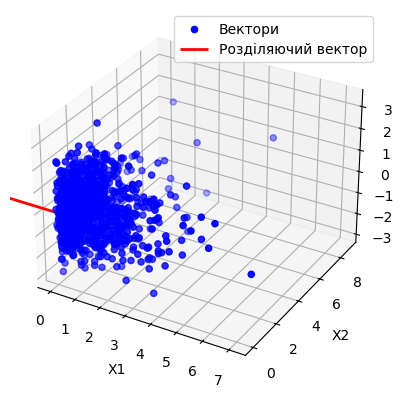

In [41]:
def main():
    # Введення користувачем кількості векторів
    try:
        n = int(input("Введіть кількість векторів (n): "))
        if n <= 0:
            raise ValueError("Кількість векторів має бути більше нуля.")
    except ValueError as e:
        print(f"Помилка вводу: {e}")
        return

    # Генерація векторів
    X = generate_random_vectors(n)
    print("\nПерші 10 згенерованих векторів:")
    print(X[:10])

    # Знаходження розділяючого вектора
    w = kozynets_separating_vector(X)

    if w is not None:
        print("\nЗнайдено розділяючий вектор:", w)
    else:
        print("\nРозділяючий вектор не знайдено. Початок координат, ймовірно, належить опуклій оболонці.")

    # Візуалізація
    visualize_vectors_and_separator(X, w)

if __name__ == "__main__":
    main()

**Пояснення**:
1. Задача розділення вирішується за допомогою linprog, що є доволі швидким і оптимізованим інструментом.
2. Забезпечено інтерактивність: користувач коду може ввести будь-яку N-кількість векторів. Програма генерує і виводить перші 10, а далі візуалізовує дані.
3. Якщо роздільний вектор знайдено, то він виводиться та відображається на графіку разом із згенерованими векторами. Графік краще візуально демонструє правильність вирішення завдання.
4. Якщо виникає якийсь спеціальний випадок і розподільний вектор неможливо порахувати, то про це повідомляється користувачеві.